In [14]:
import pandas as pd
import matplotlib.pyplot as plt

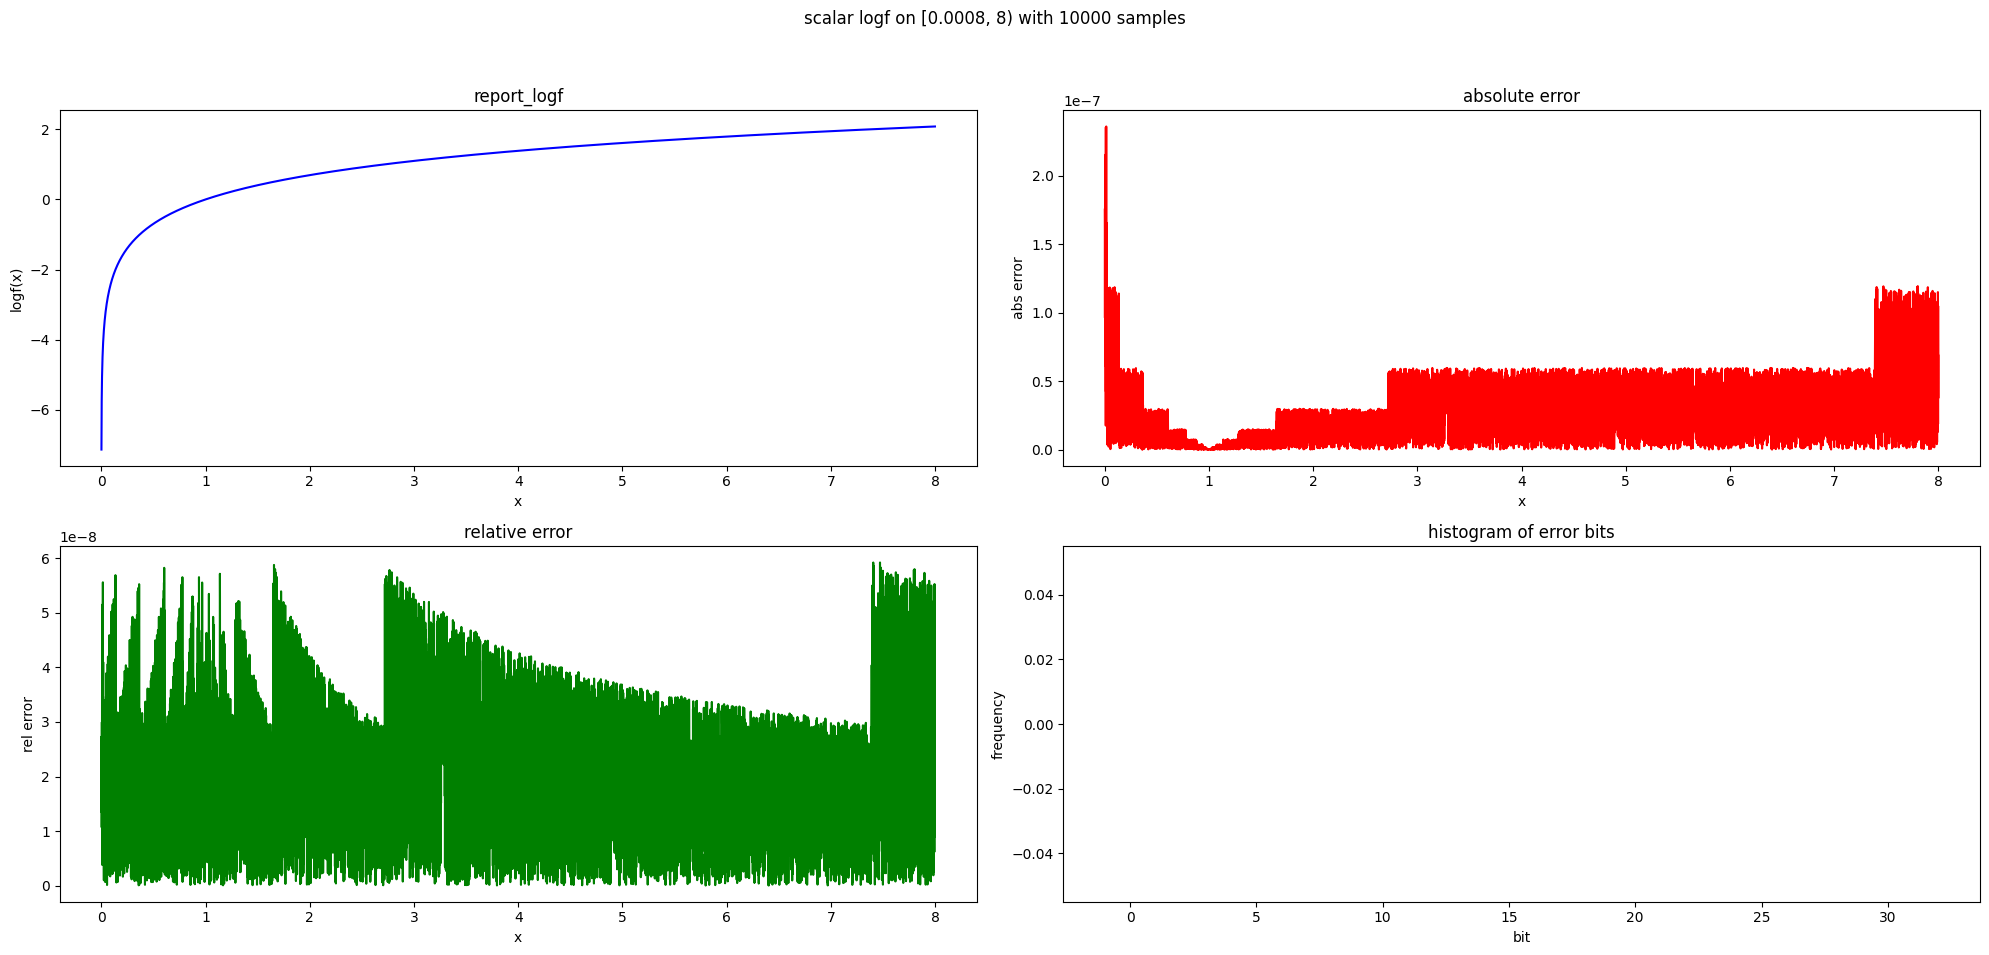

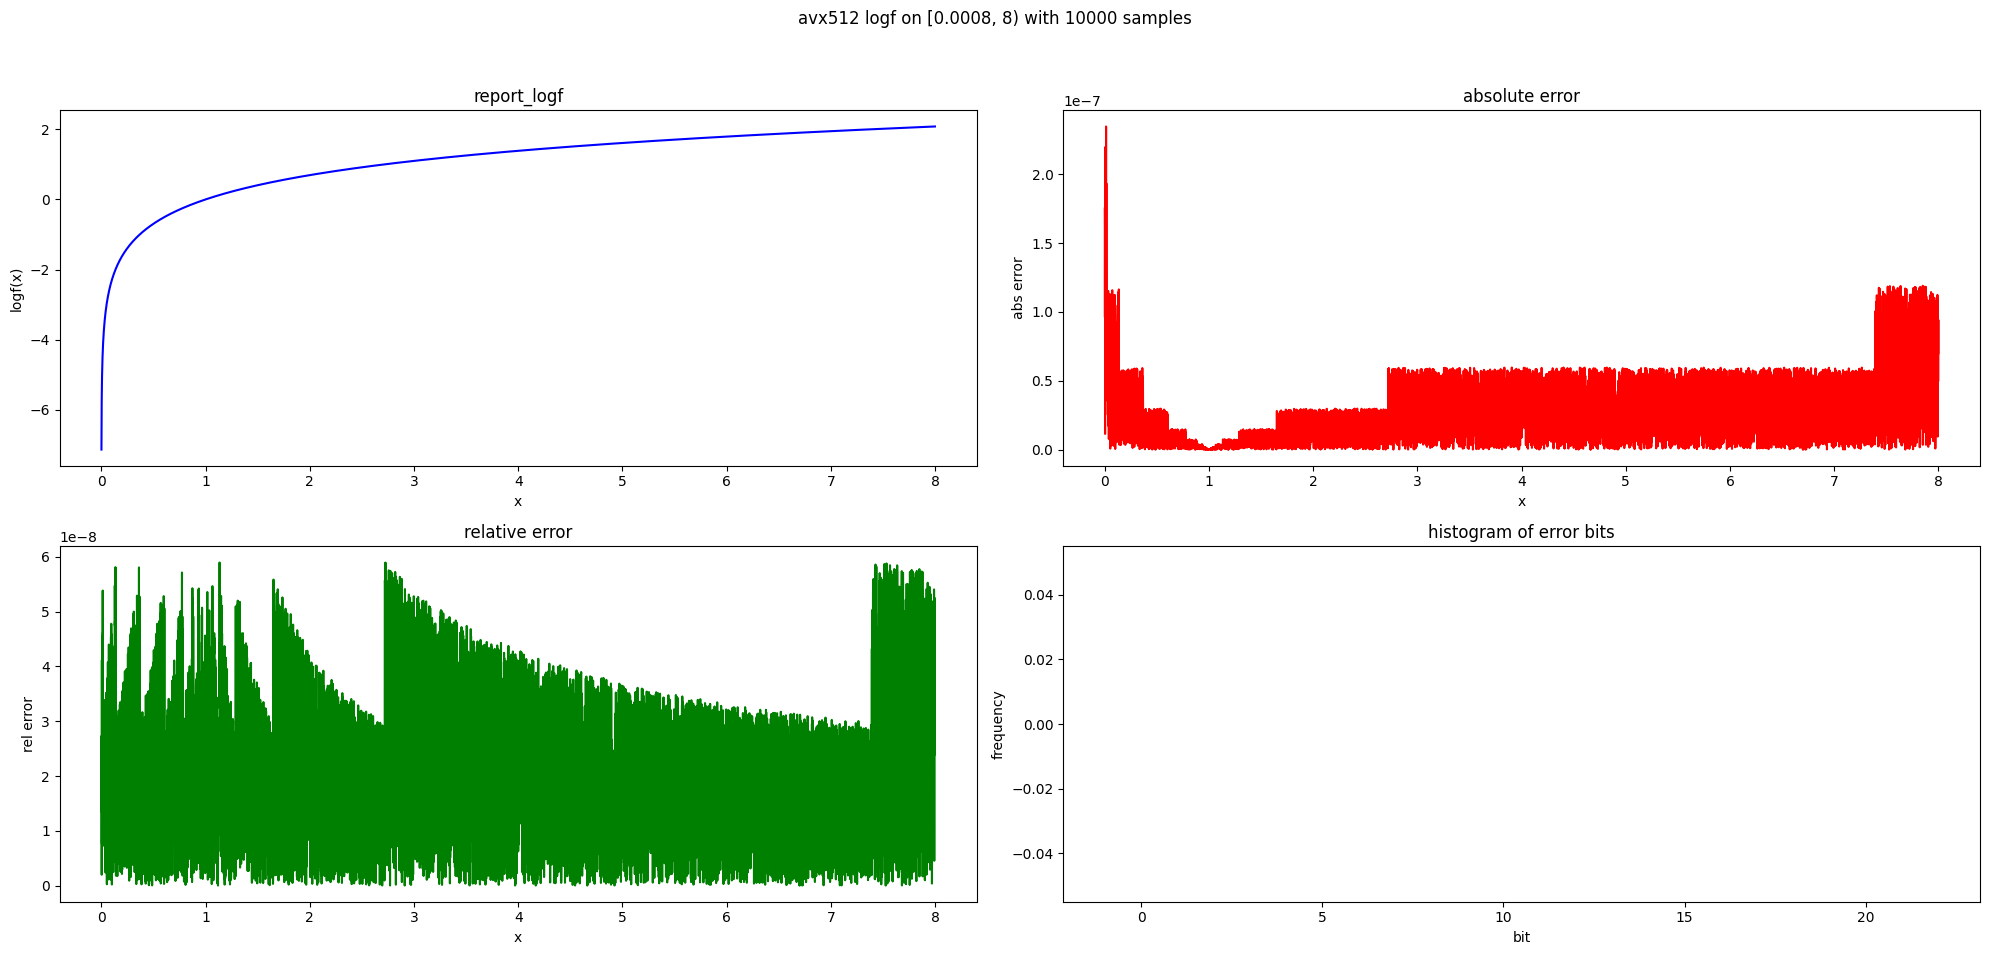

In [20]:
scalar_csv = 'reports/lalogf.csv'
vector_csv = 'reports/lalogf_avx512.csv'

df_scalar = pd.read_csv(scalar_csv)
df_vector = pd.read_csv(vector_csv)

FIGSIZE=(20, 10)

fig1, axes1 = plt.subplots(2, 2, figsize=FIGSIZE)
fig1.suptitle('scalar logf on [0.0008, 8) with 10000 samples')

axes1[0, 0].plot(df_scalar['x'], df_scalar['y'], color='blue')
axes1[0, 0].set_title('report_logf')
axes1[0, 0].set_xlabel('x')
axes1[0, 0].set_ylabel('logf(x)')

axes1[0, 1].plot(df_scalar['x'], df_scalar['abs_err'], color='red')
axes1[0, 1].set_title('absolute error')
axes1[0, 1].set_xlabel('x')
axes1[0, 1].set_ylabel('abs error')

axes1[1, 0].plot(df_scalar['x'], df_scalar['rel_err'], color='green')
axes1[1, 0].set_title('relative error')
axes1[1, 0].set_xlabel('x')
axes1[1, 0].set_ylabel('rel error')

axes1[1, 1].hist(df_scalar['first_error_bit'], bins=range(-1, 33), alpha=0.7)
axes1[1, 1].set_title('histogram of error bits')
axes1[1, 1].set_xlabel('bit')
axes1[1, 1].set_ylabel('frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('graphs/lalogf.png')

fig2, axes2 = plt.subplots(2, 2, figsize=FIGSIZE)
fig2.suptitle('avx512 logf on [0.0008, 8) with 10000 samples')

axes2[0, 0].plot(df_vector['x'], df_vector['y'], color='blue')
axes2[0, 0].set_title('report_logf')
axes2[0, 0].set_xlabel('x')
axes2[0, 0].set_ylabel('logf(x)')

axes2[0, 1].plot(df_vector['x'], df_vector['abs_err'], color='red')
axes2[0, 1].set_title('absolute error')
axes2[0, 1].set_xlabel('x')
axes2[0, 1].set_ylabel('abs error')

axes2[1, 0].plot(df_vector['x'], df_vector['rel_err'], color='green')
axes2[1, 0].set_title('relative error')
axes2[1, 0].set_xlabel('x')
axes2[1, 0].set_ylabel('rel error')

axes2[1, 1].hist(df_vector['first_error_bit'], bins=range(-1, 23), alpha=0.7)
axes2[1, 1].set_title('histogram of error bits')
axes2[1, 1].set_xlabel('bit')
axes2[1, 1].set_ylabel('frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('graphs/lalogf_avx512.png')